In [1]:
import pandas as pd
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen

import urllib
from urllib.request import Request

from user_agent import generate_user_agent

In [2]:
def get_title(url):
    req = Request(url=url, headers={'User-Agent':generate_user_agent()})
    page = urlopen(req)
    soup = BeautifulSoup(page, 'html.parser')
    tag = soup.find('strong', class_='_text')
    return tag.string

In [3]:
# url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={search_words}"
url = "https://www.imdb.com/title/tt0898266/"
req = Request(url, headers={'User-Agent':generate_user_agent()})

res = urlopen(req)

soup = BeautifulSoup(res, "html.parser")
# print(soup.prettify())

대제목

In [4]:
movie_title = soup.find("span", class_="hero__primary-text").get_text()
movie_title

'The Big Bang Theory'

In [5]:
movie_summation = soup.find("span", class_="sc-2d37a7c7-2 ggeRnl").get_text()
movie_summation

'Aspiring film actress Penny moves into a Pasadena apartment across the hall from brilliant, but socially awkward, physicists Sheldon Cooper and Leonard Hofstadter and shows them how little they know about life outside of the lab.'

In [6]:
temp = soup.find("ul", class_="ipc-inline-list ipc-inline-list--show-dividers sc-ec65ba05-2 joVhBE baseAlt")
movie_date = temp.find("a", class_="ipc-link ipc-link--baseAlt ipc-link--inherit-color").get_text()
movie_date

'2007–2019'

In [7]:
url2 = "https://www.imdb.com/title/tt0898266/episodes/?season=1"
req2 = Request(url2, headers={'User-Agent':generate_user_agent()})

res2 = urlopen(req2)

soup2 = BeautifulSoup(res2, "html.parser")
# print(soup2.prettify())

에피소드 제목

In [8]:
temp = soup2.find('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')
# temp

In [9]:
temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
# temp2

In [10]:
movie_ep_title = temp2.find('div', class_='ipc-title__text').get_text()
movie_ep_title

'S1.E1 ∙ Pilot'

에피소드 설명

In [11]:
temp = soup2.find('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')
temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
movie_ep_summation = temp2.find('div', class_='ipc-html-content-inner-div').get_text()
movie_ep_summation

'A pair of socially awkward theoretical physicists meet their new neighbor Penny, who is their polar opposite.'

In [12]:
test = soup2.find_all("article", class_="sc-282bae8e-1 ekbCxw episode-item-wrapper")
# test

In [13]:
soup2.find_all("div", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit")

[<div class="ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit" role="presentation"><li class="ipc-tab-arrow ipc-tab-arrow--left" role="presentation"><svg class="ipc-icon ipc-icon--chevron-left-inline ipc-icon--inline ipc-tab-arrow--icon" fill="currentColor" height="24" role="presentation" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg"><path d="M18.378 23.369c.398-.402.622-.947.622-1.516 0-.568-.224-1.113-.622-1.515l-8.249-8.34 8.25-8.34a2.16 2.16 0 0 0 .548-2.07A2.132 2.132 0 0 0 17.428.073a2.104 2.104 0 0 0-2.048.555l-9.758 9.866A2.153 2.153 0 0 0 5 12.009c0 .568.224 1.114.622 1.515l9.758 9.866c.808.817 2.17.817 2.998-.021z"></path></svg></li><ul class="ipc-tabs ipc-tabs--base ipc-tabs--align-left" role="tablist"><a aria-disabled="false" class="ipc-tab ipc-tab-link ipc-tab--on-base ipc-tab--active" data-testid="tab-season-entry" href="/title/tt0898266/episodes/?season=1" role="tab" tabindex="0">1</a><a aria-disabled="false" class

In [14]:
base_list = []

for idx, each2 in enumerate(soup2.find("div", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit")):
    for idx, each in enumerate(soup2.find('section', class_="sc-e55007c4-0 fZcppP")):
        temp = each.find('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')
        temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
        movie_ep_title = temp2.find('div', class_='ipc-title__text').get_text()
        movie_ep_summation = temp2.find('div', class_='ipc-html-content-inner-div').get_text()  
        base_list.append([movie_ep_title, movie_ep_summation])

# base_list

In [15]:
temp = soup2.find_all('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')[0]
temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
movie_ep_title = temp2.find('div', class_='ipc-title__text').get_text()
movie_ep_summation = temp2.find('div', class_='ipc-html-content-inner-div').get_text()
print(movie_ep_title)
print(movie_ep_summation)

S1.E1 ∙ Pilot
A pair of socially awkward theoretical physicists meet their new neighbor Penny, who is their polar opposite.


In [16]:
test = soup2.find("div", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit")
test2 = test.find("ul", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left")
test3 = test2.find("a", class_="ipc-tab ipc-tab-link ipc-tab--on-base ipc-tab--active")
print(test3)
for idx, each in enumerate(test2):
    print(each.get_text())

<a aria-disabled="false" class="ipc-tab ipc-tab-link ipc-tab--on-base ipc-tab--active" data-testid="tab-season-entry" href="/title/tt0898266/episodes/?season=1" role="tab" tabindex="0">1</a>
1
2
3
4
5
6
7
8
9
10
11
12
Unknown



In [17]:
from tqdm import tqdm
import pandas as pd
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen

import re
import urllib
from urllib.request import Request

from user_agent import generate_user_agent

In [18]:
base_list = []

url2 = "https://www.imdb.com/title/tt0898266/episodes/?season=1"
req2 = Request(url2, headers={'User-Agent':generate_user_agent()})

res2 = urlopen(req2)

soup2 = BeautifulSoup(res2, "html.parser")

test = soup2.find("div", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left ipc-tabs--display-chip ipc-tabs--inherit")
test2 = test.find("ul", class_="ipc-tabs ipc-tabs--base ipc-tabs--align-left")
test3 = test2.find_all("a")

all_watch = 0.0

for idx1, each1 in tqdm(enumerate(test3)):
    # print(each1.get_text(),end=" ")
    
    url2 = "https://www.imdb.com/title/tt0898266/episodes/?season={search_words}"
    req2 = Request(url2.format(search_words = urllib.parse.quote(str(each1.get_text()))), headers={'User-Agent':generate_user_agent()})

    res2 = urlopen(req2)
    soup2 = BeautifulSoup(res2, "html.parser")

    for idx2, each2 in enumerate(soup2.find("a", class_="ipc-tab ipc-tab-link ipc-tab--on-base ipc-tab--active")):
        
        for idx3, each in enumerate(soup2.find('section', class_="sc-e55007c4-0 fZcppP")):
            temp = each.find('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')
            temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
            temp3 = temp.find('span', class_='sc-ccd6e31b-10 dYquTu')
            star_rating = temp2.find('span', class_='ipc-rating-star--rating').get_text()
            
            # 조회수 구하는 용
            movie_watched = temp2.find('span', class_ = 'ipc-rating-star--voteCount').get_text()
            movie_watched_list = re.findall("\d*?\.?\d+?K" ,movie_watched)
            movie_watched_num = movie_watched_list[0].split("K")[0]
            rounded_number = round(float(movie_watched_num) , 2)
            all_watch = all_watch + rounded_number
            # print(all_watch)

            movie_ep_title = temp2.find('div', class_='ipc-title__text').get_text()
            movie_ep_summation = temp2.find('div', class_='ipc-html-content-inner-div').get_text()
            movie_ep_date = temp3.get_text()
            # print(movie_ep_date,end=" ")
            # print(movie_ep_title,end=" ")
            # print(movie_ep_summation)

            if base_list == True: season = "S" + re.findall("\w\d+?\." ,movie_ep_title)[0]
            else : season = str(each1.get_text())
            if base_list == True: ep_title = ''.join(re.findall("(E\d+?)(\s)(\S)(\s)(\D*)" ,movie_ep_title))
            else : ep_title = movie_ep_title
            
            base_list.append([movie_ep_date, season, ep_title, movie_ep_summation, star_rating, rounded_number])
    
# base_list


13it [00:24,  1.91s/it]


In [19]:
each = soup2.find('section', class_="sc-e55007c4-0 fZcppP")
temp = each.find('div', class_='ipc-list-card sc-ccd6e31b-0 jtLMpO ipc-list-card--base')
temp2 = temp.find('div', class_='sc-ccd6e31b-1 ggXjkj')
temp3 = temp.find('span', class_='sc-ccd6e31b-10 dYquTu')
temp3.get_text()

'Sat, Jun 29, 2019'

In [20]:
date1 = soup.find('div', class_='sc-491663c0-3 kNMkxz')
date2 = date1.find('div', class_='sc-1f50b7c-0 iPPbjm')
movie_date = date2.find('a',class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color').get_text()
movie_title = soup.find("span", class_="hero__primary-text").get_text()
movie_summation = soup.find("span", class_="sc-2d37a7c7-2 ggeRnl").get_text()
movie_rating = soup.find("span", class_="sc-eb51e184-1 ljxVSS").get_text()
movie_date, movie_title, movie_summation, movie_rating

('2007–2019',
 'The Big Bang Theory',
 'Aspiring film actress Penny moves into a Pasadena apartment across the hall from brilliant, but socially awkward, physicists Sheldon Cooper and Leonard Hofstadter and shows them how little they know about life outside of the lab.',
 '8.1')

<h2>데이터 프레임</h2>

In [21]:
import pandas as pd 
import numpy as np
#movie_summation,movie_title
base_list.insert(0,[movie_date, 0, movie_title, movie_summation, movie_rating, all_watch])
df = pd.DataFrame(base_list, columns=["Date", "Season", "Ep_Title", "Descripve", "Rating", "Watched"])

df.sort_index()

,Date,Season,Ep_Title,Descripve,Rating,Watched
0,2007–2019,0,The Big Bang Theory,Aspiring film actress Penny moves into a Pasad...,8.1,1024.2
1,"Sun, Sep 23, 2007",1,S1.E1 ∙ Pilot,A pair of socially awkward theoretical physici...,8.1,7.4
2,"Sun, Sep 30, 2007",1,S1.E2 ∙ The Big Bran Hypothesis,Penny is furious with Leonard and Sheldon when...,8.2,6.0
3,"Sun, Oct 7, 2007",1,S1.E3 ∙ The Fuzzy Boots Corollary,Leonard gets upset when he discovers that Penn...,7.6,5.3
4,"Sun, Oct 14, 2007",1,S1.E4 ∙ The Luminous Fish Effect,Sheldon's mother is called to intervene when h...,8.0,5.4
...,...,...,...,...,...,...
276,"Wed, May 1, 2019",12,S12.E21 ∙ The Plagiarism Schism,Kripke has proof that Dr. Pemberton plagiarize...,7.3,2.5
277,"Wed, May 8, 2019",12,S12.E22 ∙ The Maternal Conclusion,Leonard is pleasantly surprised when Beverly c...,7.9,3.0
278,"Wed, May 15, 2019",12,S12.E23 ∙ The Change Constant,Sheldon and Amy await big news.,9.0,5.2
279,"Wed, May 15, 2019",12,S12.E24 ∙ The Stockholm Syndrome,Bernadette and Wolowitz leave their kids for t...,9.5,11.0


In [22]:
base_list[0]

['2007–2019',
 0,
 'The Big Bang Theory',
 'Aspiring film actress Penny moves into a Pasadena apartment across the hall from brilliant, but socially awkward, physicists Sheldon Cooper and Leonard Hofstadter and shows them how little they know about life outside of the lab.',
 '8.1',
 1024.2]

In [23]:
date1 = soup.find('div', class_='sc-491663c0-3 kNMkxz')
date2 = date1.find('div', class_='sc-1f50b7c-0 iPPbjm')
movie_date = date2.find('a',class_='ipc-link ipc-link--baseAlt ipc-link--inherit-color').get_text()
movie_date

'2007–2019'

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
season_list = np.arange(0, len(df['Season'].unique()))
season_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [26]:

# print(df.loc[df.Season == "1","Rating"] ,len(df.loc[df.Season == "1",:]))
rating_list = df.loc[df.Season == "1","Rating"]
rating_list = rating_list.to_list()
print(rating_list)

['8.1', '8.2', '7.6', '8.0', '7.8', '8.3', '8.1', '8.1', '7.9', '8.0', '8.2', '7.8', '8.2', '8.0', '8.2', '8.3', '8.5']


In [27]:
ep_list = np.arange(0, len(df.loc[df.Season == "1",:]))
ep_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [28]:
rate_data = []
for idx, x in enumerate(df['Season'].unique()):
    rate_data.append("S" + str(idx))
    rating_list = df.loc[df.Season == x,"Rating"]
    rating_list = rating_list.to_list()
    rate_data.append(rating_list)
    # rating_list = df.loc[df.Season == x,"Rating"]
    # rating_list = rating_list.to_list()
    # rate_data.append(rating_list, ignore_index=True)
# rate_data

In [29]:
print(rate_data[0::2])
print(rate_data[1::2])
print(rate_data[1::2][0])
print(rate_data[1::2][0][0])

['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13']
[['8.1'], ['8.1', '8.2', '7.6', '8.0', '7.8', '8.3', '8.1', '8.1', '7.9', '8.0', '8.2', '7.8', '8.2', '8.0', '8.2', '8.3', '8.5'], ['8.2', '8.0', '8.7', '7.9', '8.3', '8.2', '8.6', '8.0', '8.1', '7.6', '9.1', '7.8', '7.9', '8.0', '8.8', '8.1', '8.0', '8.1', '8.1', '7.9', '8.5', '8.1', '8.2'], ['8.3', '7.7', '8.1', '8.0', '8.3', '7.4', '7.8', '8.9', '8.3', '8.4', '8.2', '8.2', '8.0', '8.4', '8.0', '8.2', '8.4', '8.4', '7.8', '8.1', '8.1', '9.0', '8.6'], ['8.7', '8.3', '7.9', '8.0', '7.6', '8.0', '8.0', '8.1', '8.4', '7.6', '8.6', '7.5', '8.2', '7.7', '7.7', '7.8', '7.9', '8.1', '8.0', '8.2', '8.2', '7.7', '8.0', '8.5'], ['8.0', '8.0', '7.6', '7.8', '8.0', '7.5', '8.5', '7.6', '8.1', '7.9', '7.3', '7.6', '8.1', '8.2', '7.7', '7.5', '7.8', '8.2', '8.1', '8.1', '8.5', '7.7', '8.1', '8.5'], ['7.6', '7.6', '7.9', '8.2', '8.0', '7.8', '7.6', '8.4', '8.2', '8.0', '7.8', '8.4', '8.4', '7.7', '8.2', '7.8', '

In [30]:
ep_list = rate_data[1::2]
max_ep = 0
for idx, x in enumerate(ep_list):
    # print(len(ep_list[idx]))
    if max_ep <= len(ep_list[idx]):
        max_ep = len(ep_list[idx])

ep_length = []
for x in range(max_ep):
    ep_length.append(np.nan)
    ep_length[x] = "E" + str(x+1)

# print(max_ep, ep_length)

In [31]:
from decimal import Decimal, getcontext

getcontext().prec = 1

rate_data_int = rate_data[1::2]
# rate_data_int = list(map(float,rate_data_int))
# type(rate_data_int[0][0])
for idx, x in enumerate(rate_data_int):
    for idx2, x2 in enumerate(rate_data_int[idx]):
        num_temp = rate_data_int[idx][idx2]
        rate_data_int[idx][idx2] = float(num_temp)
        # print(rate_data_int[idx][idx2], end=" ")

print(rate_data_int)

[[8.1], [8.1, 8.2, 7.6, 8.0, 7.8, 8.3, 8.1, 8.1, 7.9, 8.0, 8.2, 7.8, 8.2, 8.0, 8.2, 8.3, 8.5], [8.2, 8.0, 8.7, 7.9, 8.3, 8.2, 8.6, 8.0, 8.1, 7.6, 9.1, 7.8, 7.9, 8.0, 8.8, 8.1, 8.0, 8.1, 8.1, 7.9, 8.5, 8.1, 8.2], [8.3, 7.7, 8.1, 8.0, 8.3, 7.4, 7.8, 8.9, 8.3, 8.4, 8.2, 8.2, 8.0, 8.4, 8.0, 8.2, 8.4, 8.4, 7.8, 8.1, 8.1, 9.0, 8.6], [8.7, 8.3, 7.9, 8.0, 7.6, 8.0, 8.0, 8.1, 8.4, 7.6, 8.6, 7.5, 8.2, 7.7, 7.7, 7.8, 7.9, 8.1, 8.0, 8.2, 8.2, 7.7, 8.0, 8.5], [8.0, 8.0, 7.6, 7.8, 8.0, 7.5, 8.5, 7.6, 8.1, 7.9, 7.3, 7.6, 8.1, 8.2, 7.7, 7.5, 7.8, 8.2, 8.1, 8.1, 8.5, 7.7, 8.1, 8.5], [7.6, 7.6, 7.9, 8.2, 8.0, 7.8, 7.6, 8.4, 8.2, 8.0, 7.8, 8.4, 8.4, 7.7, 8.2, 7.8, 7.6, 7.7, 8.1, 8.0, 8.0, 7.9, 8.1, 7.7], [7.7, 7.9, 8.7, 7.8, 7.6, 8.4, 7.7, 7.5, 8.8, 7.6, 8.1, 7.4, 7.5, 8.0, 8.2, 7.6, 7.4, 7.4, 8.1, 8.0, 7.5, 7.7, 7.8, 8.0], [7.2, 7.5, 7.0, 7.2, 7.5, 7.2, 7.7, 8.0, 7.5, 7.0, 7.4, 7.2, 7.4, 8.0, 8.0, 7.8, 7.5, 7.3, 7.5, 7.5, 7.0, 7.3, 7.5, 7.9], [6.8, 7.3, 7.7, 7.4, 7.4, 7.2, 7.9, 7.9, 7.8, 8.3, 9.0, 7.4, 

In [32]:
import pandas as pd 
import numpy as np

testdf = pd.DataFrame(index=rate_data[0::2], columns=ep_length, data=rate_data[1::2])
# testdf = pd.DataFrame(index=rate_data[0::2], columns=ep_length)
testdf


,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24
S0,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1,8.1,8.2,7.6,8.0,7.8,8.3,8.1,8.1,7.9,8.0,...,8.2,8.3,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S2,8.2,8.0,8.7,7.9,8.3,8.2,8.6,8.0,8.1,7.6,...,8.8,8.1,8.0,8.1,8.1,7.9,8.5,8.1,8.2,NaN
S3,8.3,7.7,8.1,8.0,8.3,7.4,7.8,8.9,8.3,8.4,...,8.0,8.2,8.4,8.4,7.8,8.1,8.1,9.0,8.6,NaN
S4,8.7,8.3,7.9,8.0,7.6,8.0,8.0,8.1,8.4,7.6,...,7.7,7.8,7.9,8.1,8.0,8.2,8.2,7.7,8.0,8.5
S5,8.0,8.0,7.6,7.8,8.0,7.5,8.5,7.6,8.1,7.9,...,7.7,7.5,7.8,8.2,8.1,8.1,8.5,7.7,8.1,8.5
S6,7.6,7.6,7.9,8.2,8.0,7.8,7.6,8.4,8.2,8.0,...,8.2,7.8,7.6,7.7,8.1,8.0,8.0,7.9,8.1,7.7
S7,7.7,7.9,8.7,7.8,7.6,8.4,7.7,7.5,8.8,7.6,...,8.2,7.6,7.4,7.4,8.1,8.0,7.5,7.7,7.8,8.0
S8,7.2,7.5,7.0,7.2,7.5,7.2,7.7,8.0,7.5,7.0,...,8.0,7.8,7.5,7.3,7.5,7.5,7.0,7.3,7.5,7.9
S9,6.8,7.3,7.7,7.4,7.4,7.2,7.9,7.9,7.8,8.3,...,7.5,7.4,7.5,7.5,7.4,7.4,7.4,7.4,7.4,7.8


In [33]:
testdf = testdf.fillna(0)
testdf

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24
S0,8.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S1,8.1,8.2,7.6,8.0,7.8,8.3,8.1,8.1,7.9,8.0,...,8.2,8.3,8.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S2,8.2,8.0,8.7,7.9,8.3,8.2,8.6,8.0,8.1,7.6,...,8.8,8.1,8.0,8.1,8.1,7.9,8.5,8.1,8.2,0.0
S3,8.3,7.7,8.1,8.0,8.3,7.4,7.8,8.9,8.3,8.4,...,8.0,8.2,8.4,8.4,7.8,8.1,8.1,9.0,8.6,0.0
S4,8.7,8.3,7.9,8.0,7.6,8.0,8.0,8.1,8.4,7.6,...,7.7,7.8,7.9,8.1,8.0,8.2,8.2,7.7,8.0,8.5
S5,8.0,8.0,7.6,7.8,8.0,7.5,8.5,7.6,8.1,7.9,...,7.7,7.5,7.8,8.2,8.1,8.1,8.5,7.7,8.1,8.5
S6,7.6,7.6,7.9,8.2,8.0,7.8,7.6,8.4,8.2,8.0,...,8.2,7.8,7.6,7.7,8.1,8.0,8.0,7.9,8.1,7.7
S7,7.7,7.9,8.7,7.8,7.6,8.4,7.7,7.5,8.8,7.6,...,8.2,7.6,7.4,7.4,8.1,8.0,7.5,7.7,7.8,8.0
S8,7.2,7.5,7.0,7.2,7.5,7.2,7.7,8.0,7.5,7.0,...,8.0,7.8,7.5,7.3,7.5,7.5,7.0,7.3,7.5,7.9
S9,6.8,7.3,7.7,7.4,7.4,7.2,7.9,7.9,7.8,8.3,...,7.5,7.4,7.5,7.5,7.4,7.4,7.4,7.4,7.4,7.8


<h2>각 시즌별 에피소드별 평점 반응</h2><h3>(세로 축 : 시즌, 가로 축 : 에피소드)</h3>

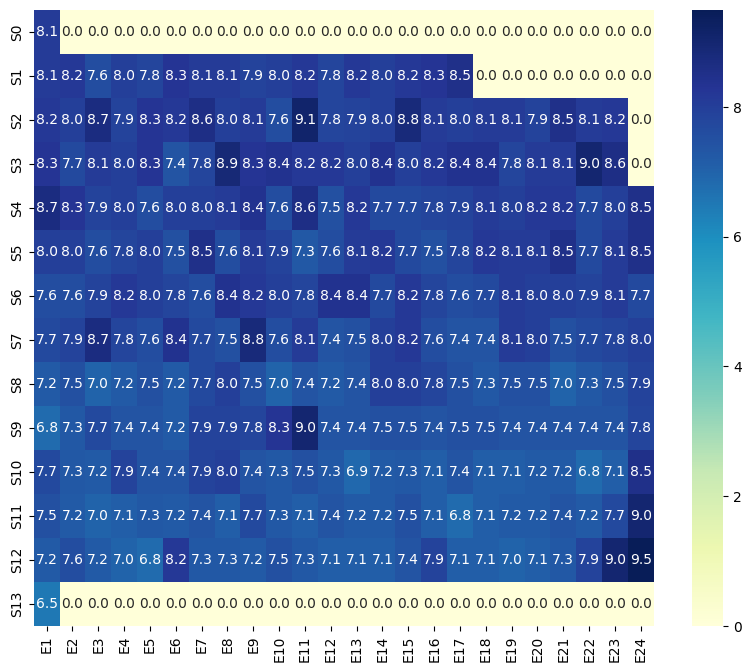

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(testdf, annot=True, fmt=".1f", cmap="YlGnBu")
plt.show()

In [35]:
rate_data = []
for idx, x in enumerate(df['Season'].unique()):
    rate_data.append("S" + str(idx))
    rating_list = df.loc[df.Season == x,"Watched"]
    rating_list = rating_list.to_list()
    rate_data.append(rating_list)
    # rating_list = df.loc[df.Season == x,"Rating"]
    # rating_list = rating_list.to_list()
    # rate_data.append(rating_list, ignore_index=True)
# rate_data

In [36]:
ep_list = rate_data[1::2]
max_ep = 0
for idx, x in enumerate(ep_list):
    print(len(ep_list[idx]))
    if max_ep <= len(ep_list[idx]):
        max_ep = len(ep_list[idx])

ep_length = []
for x in range(max_ep):
    ep_length.append(np.nan)
    ep_length[x] = "E" + str(x+1)

# print(max_ep, ep_length)

1
17
23
23
24
24
24
24
24
24
24
24
24
1


In [37]:
from decimal import Decimal, getcontext

getcontext().prec = 1

rate_data_int = rate_data[1::2]
# rate_data_int = list(map(float,rate_data_int))
# type(rate_data_int[0][0])
for idx, x in enumerate(rate_data_int):
    for idx2, x2 in enumerate(rate_data_int[idx]):
        num_temp = rate_data_int[idx][idx2]
        rate_data_int[idx][idx2] = float(num_temp)
        # print(rate_data_int[idx][idx2], end=" ")

print(rate_data_int)

[[1024.2], [7.4, 6.0, 5.3, 5.4, 5.1, 5.3, 5.0, 5.1, 4.9, 5.0, 5.0, 4.7, 4.9, 4.8, 5.0, 4.7, 4.9], [4.8, 4.5, 5.2, 4.5, 4.6, 4.6, 4.9, 4.4, 4.4, 4.3, 7.2, 4.3, 4.3, 4.3, 5.1, 4.3, 4.6, 4.3, 4.3, 4.2, 4.5, 4.1, 4.2], [4.5, 4.1, 4.3, 4.2, 4.3, 4.0, 4.0, 5.7, 4.2, 4.3, 4.2, 4.1, 4.0, 4.4, 4.0, 4.1, 4.3, 4.2, 4.0, 4.0, 4.2, 5.5, 4.3], [4.8, 4.3, 4.1, 4.0, 3.9, 4.0, 4.0, 4.0, 4.2, 3.9, 4.4, 3.9, 4.2, 3.9, 3.9, 3.8, 3.8, 4.0, 3.9, 3.8, 3.9, 3.7, 3.8, 4.0], [4.4, 4.0, 3.8, 3.9, 3.8, 3.8, 4.6, 3.7, 3.9, 3.8, 3.7, 3.7, 4.0, 4.0, 3.6, 3.6, 3.7, 3.9, 3.7, 3.9, 4.3, 3.7, 3.6, 4.1], [4.6, 3.8, 3.8, 4.1, 3.8, 3.6, 3.6, 4.2, 4.0, 3.8, 3.7, 4.1, 4.1, 3.6, 3.8, 3.6, 3.5, 3.6, 3.8, 3.7, 3.6, 3.7, 3.8, 3.6], [4.0, 3.9, 4.8, 3.7, 3.5, 4.2, 3.5, 3.5, 4.9, 3.3, 3.7, 3.4, 3.4, 3.7, 3.8, 3.3, 3.2, 3.3, 3.6, 3.3, 3.2, 3.3, 3.3, 3.4], [3.9, 3.7, 3.6, 3.4, 3.5, 3.3, 3.7, 3.7, 3.3, 3.3, 3.2, 3.1, 3.1, 3.4, 3.5, 3.3, 3.1, 3.1, 3.1, 3.1, 3.0, 3.0, 3.1, 3.5], [3.9, 3.3, 3.4, 3.2, 3.1, 3.2, 3.3, 3.3, 3.2, 3.7, 5.5, 3.

In [38]:
testdf2 = pd.DataFrame(index=rate_data[0::2], columns=ep_length, data=rate_data[1::2])
# testdf = pd.DataFrame(index=rate_data[0::2], columns=ep_length)
testdf2

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24
S0,1024.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1,7.4,6.0,5.3,5.4,5.1,5.3,5.0,5.1,4.9,5.0,...,5.0,4.7,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S2,4.8,4.5,5.2,4.5,4.6,4.6,4.9,4.4,4.4,4.3,...,5.1,4.3,4.6,4.3,4.3,4.2,4.5,4.1,4.2,NaN
S3,4.5,4.1,4.3,4.2,4.3,4.0,4.0,5.7,4.2,4.3,...,4.0,4.1,4.3,4.2,4.0,4.0,4.2,5.5,4.3,NaN
S4,4.8,4.3,4.1,4.0,3.9,4.0,4.0,4.0,4.2,3.9,...,3.9,3.8,3.8,4.0,3.9,3.8,3.9,3.7,3.8,4.0
S5,4.4,4.0,3.8,3.9,3.8,3.8,4.6,3.7,3.9,3.8,...,3.6,3.6,3.7,3.9,3.7,3.9,4.3,3.7,3.6,4.1
S6,4.6,3.8,3.8,4.1,3.8,3.6,3.6,4.2,4.0,3.8,...,3.8,3.6,3.5,3.6,3.8,3.7,3.6,3.7,3.8,3.6
S7,4.0,3.9,4.8,3.7,3.5,4.2,3.5,3.5,4.9,3.3,...,3.8,3.3,3.2,3.3,3.6,3.3,3.2,3.3,3.3,3.4
S8,3.9,3.7,3.6,3.4,3.5,3.3,3.7,3.7,3.3,3.3,...,3.5,3.3,3.1,3.1,3.1,3.1,3.0,3.0,3.1,3.5
S9,3.9,3.3,3.4,3.2,3.1,3.2,3.3,3.3,3.2,3.7,...,3.0,3.1,3.1,2.9,2.8,2.8,2.8,2.7,2.8,3.1


In [39]:
testdf2 = testdf2.fillna(0)
testdf2.drop(["S0"], axis=0, inplace=True)
testdf2

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E15,E16,E17,E18,E19,E20,E21,E22,E23,E24
S1,7.4,6.0,5.3,5.4,5.1,5.3,5.0,5.1,4.9,5.0,...,5.0,4.7,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S2,4.8,4.5,5.2,4.5,4.6,4.6,4.9,4.4,4.4,4.3,...,5.1,4.3,4.6,4.3,4.3,4.2,4.5,4.1,4.2,0.0
S3,4.5,4.1,4.3,4.2,4.3,4.0,4.0,5.7,4.2,4.3,...,4.0,4.1,4.3,4.2,4.0,4.0,4.2,5.5,4.3,0.0
S4,4.8,4.3,4.1,4.0,3.9,4.0,4.0,4.0,4.2,3.9,...,3.9,3.8,3.8,4.0,3.9,3.8,3.9,3.7,3.8,4.0
S5,4.4,4.0,3.8,3.9,3.8,3.8,4.6,3.7,3.9,3.8,...,3.6,3.6,3.7,3.9,3.7,3.9,4.3,3.7,3.6,4.1
S6,4.6,3.8,3.8,4.1,3.8,3.6,3.6,4.2,4.0,3.8,...,3.8,3.6,3.5,3.6,3.8,3.7,3.6,3.7,3.8,3.6
S7,4.0,3.9,4.8,3.7,3.5,4.2,3.5,3.5,4.9,3.3,...,3.8,3.3,3.2,3.3,3.6,3.3,3.2,3.3,3.3,3.4
S8,3.9,3.7,3.6,3.4,3.5,3.3,3.7,3.7,3.3,3.3,...,3.5,3.3,3.1,3.1,3.1,3.1,3.0,3.0,3.1,3.5
S9,3.9,3.3,3.4,3.2,3.1,3.2,3.3,3.3,3.2,3.7,...,3.0,3.1,3.1,2.9,2.8,2.8,2.8,2.7,2.8,3.1
S10,3.6,3.0,2.9,3.1,2.8,2.9,3.0,3.1,2.8,2.8,...,2.6,2.5,2.6,2.5,2.6,2.6,2.6,2.5,2.5,3.6


<h2>각 시즌별 에피소드별 조회수</h2><h3>(세로 축 : 시즌, 가로 축 : 에피소드)</h3>

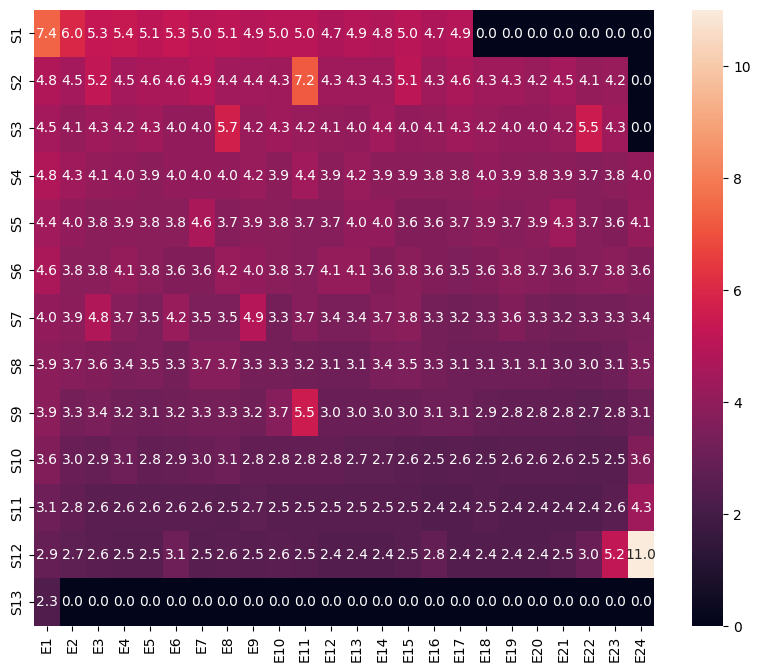

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(testdf2, annot=True, fmt=".1f")
plt.show()